In [323]:
# Importing the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [390]:
# Importing the HBO Max Dataset and specifying the index column
hbo = pd.read_csv ('titles.csv', index_col=0)

In [391]:
hbo.info()
# From this info I can see that there are some columns that I don't plan on using, so I will remove them later
# 3294 movies and tv shows are in this dataset with 14 columns in total

<class 'pandas.core.frame.DataFrame'>
Index: 3294 entries, tm155702 to tm989132
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 3294 non-null   object 
 1   type                  3294 non-null   object 
 2   description           3282 non-null   object 
 3   release_year          3294 non-null   int64  
 4   age_certification     2086 non-null   object 
 5   runtime               3294 non-null   int64  
 6   genres                3294 non-null   object 
 7   production_countries  3294 non-null   object 
 8   seasons               756 non-null    float64
 9   imdb_id               2968 non-null   object 
 10  imdb_score            2922 non-null   float64
 11  imdb_votes            2911 non-null   float64
 12  tmdb_popularity       3261 non-null   float64
 13  tmdb_score            3026 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 386.0+ KB


# Data Overview

In [392]:
print(hbo)

                                                    title   type  \
id                                                                 
tm155702                                 The Wizard of Oz  MOVIE   
tm83648                                      Citizen Kane  MOVIE   
tm77588                                        Casablanca  MOVIE   
tm82363                                     The Big Sleep  MOVIE   
tm84701                                The Maltese Falcon  MOVIE   
...                                                   ...    ...   
tm1082718  Romeo Santos: Utopia Live from MetLife Stadium  MOVIE   
tm1067128                                       Algo Azul  MOVIE   
tm1121489                        Entre Nos: What She Said  MOVIE   
tm1121486                        Entre Nos: The Winners 2  MOVIE   
tm989132                              The Infamous Future  MOVIE   

                                                 description  release_year  \
id                                   

In [398]:
# Taking a look at the first 5 rows of the dataset, from here I can see that I will need to remove the description
# column along with the square brackets and single quotation marks from the values in two columns.
hbo.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,,,,,,,,
tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8


In [399]:
# Checking for duplicate entries, thankfully there are none so i don't need to drop any rows at this point
hbo.duplicated().sum()

0

In [400]:
# Checking for missing values
hbo.isnull().sum()

title                      0
type                       0
description               12
release_year               0
age_certification       1208
runtime                    0
genres                     0
production_countries       0
seasons                 2538
imdb_id                  326
imdb_score               372
imdb_votes               383
tmdb_popularity           33
tmdb_score               268
dtype: int64

# Clean and Validate

In [401]:
# Making a copy of the HBO dataset
hbo_df = hbo.copy()

In [402]:
# Removing some columns that I don't plan on using
hbo_df = hbo_df.drop(['description', 'imdb_id', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], axis=1)

In [403]:
# Removing unnecessary square brackets and single quotes from two columns
hbo_df['genres'] = hbo_df['genres'].str.replace(r'[][]', '', regex=True)
hbo_df['genres'] = hbo_df['genres'].str.replace(r"'", '', regex=True)
hbo_df['production_countries'] = hbo_df['production_countries'].str.replace(r'[][]', '', regex=True)
hbo_df['production_countries'] = hbo_df['production_countries'].str.replace(r"'", '', regex=True)

In [404]:
# Cleaning up column titles before moving on
hbo_df = hbo_df.rename(columns={"title":"Title", "type":"Type", "release_year":"Release Year"
                                       , "age_certification":"Age Certification", "runtime":"Runtime"
                                       , "genres":"Genres", "production_countries":"Production Countries"
                                       , "seasons":"Seasons", "imdb_score":"IMDB Rating"}) 

In [405]:
hbo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3294 entries, tm155702 to tm989132
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 3294 non-null   object 
 1   Type                  3294 non-null   object 
 2   Release Year          3294 non-null   int64  
 3   Age Certification     2086 non-null   object 
 4   Runtime               3294 non-null   int64  
 5   Genres                3294 non-null   object 
 6   Production Countries  3294 non-null   object 
 7   Seasons               756 non-null    float64
 8   IMDB Rating           2922 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 257.3+ KB


In [412]:
# Checking to see how it looks and for any issues before moving on
hbo_df.head()

,Title,Type,Release Year,Age Certification,Runtime,Genres,Production Countries,Seasons,IMDB Rating
id,,,,,,,,,
tm155702,The Wizard of Oz,MOVIE,1939,G,102,"fantasy, family",US,NaN,8.1
tm83648,Citizen Kane,MOVIE,1941,PG,119,drama,US,NaN,8.3
tm77588,Casablanca,MOVIE,1942,PG,102,"drama, romance, war",US,NaN,8.5
tm82363,The Big Sleep,MOVIE,1946,NaN,116,"thriller, crime",US,NaN,7.9
tm84701,The Maltese Falcon,MOVIE,1941,NaN,100,"thriller, romance, crime",US,NaN,8.0


# Adding another dataset and merging

In [421]:
# Importing another HBO Max dataset containing director and actor/actress info for the movies and shows  in the 
# dataset above, I am setting the "role" column as the index as I will now be subsetting the dataframe with with .loc
credits = pd.read_csv ('credits.csv', index_col=4)

In [422]:
# 66393 rows with 4 columns
credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66393 entries, ACTOR to DIRECTOR
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  66393 non-null  int64 
 1   id         66393 non-null  object
 2   name       66393 non-null  object
 3   character  61888 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.5+ MB


In [423]:
# Looking at the first 5 rows again
credits.head()

,person_id,id,name,character
role,,,,
ACTOR,60017,tm155702,Judy Garland,Dorothy Gale
ACTOR,53496,tm155702,Ray Bolger,Hunk / Scarecrow
ACTOR,79549,tm155702,Jack Haley,Hickory / Tin Man
ACTOR,79548,tm155702,Bert Lahr,Zeke / Cowardly Lion
ACTOR,60995,tm155702,Margaret Hamilton,Elmira Gulch / Wicked Witch of the West


In [433]:
# Making a copy of the second dataframe
credits_df = credits.copy()

In [434]:
# Removing some columns that I don't plan on using
credits_df = credits_df.drop(['person_id', 'character'], axis=1)

In [435]:
# Subsetting the roles column for Directors only
credits_df = credits_df.loc["DIRECTOR"]
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2774 entries, DIRECTOR to DIRECTOR
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2774 non-null   object
 1   name    2774 non-null   object
dtypes: object(2)
memory usage: 65.0+ KB


In [436]:
# I am now left with 2774 rows which I will merge with the existing dataframe
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2774 entries, DIRECTOR to DIRECTOR
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2774 non-null   object
 1   name    2774 non-null   object
dtypes: object(2)
memory usage: 65.0+ KB


In [437]:
# Setting the index to id before merging, this will drop the role column
credits_df = credits_df.set_index("id")

In [438]:
# Merging the two dataframes
hbo_merged = hbo_df.merge(credits_df, on='id')

In [439]:
hbo_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2774 entries, tm155702 to tm989132
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 2774 non-null   object 
 1   Type                  2774 non-null   object 
 2   Release Year          2774 non-null   int64  
 3   Age Certification     1637 non-null   object 
 4   Runtime               2774 non-null   int64  
 5   Genres                2774 non-null   object 
 6   Production Countries  2774 non-null   object 
 7   Seasons               104 non-null    float64
 8   IMDB Rating           2468 non-null   float64
 9   name                  2774 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 238.4+ KB


In [440]:
# Changing name column title to Director now that i have dropped all other roles with .loc
hbo_merged = hbo_merged.rename(columns={"name":"Director"}) 

In [441]:
# Checking column names before moving on, looks good
hbo_merged.head()

,Title,Type,Release Year,Age Certification,Runtime,Genres,Production Countries,Seasons,IMDB Rating,Director
id,,,,,,,,,,
tm155702,The Wizard of Oz,MOVIE,1939,G,102,"fantasy, family",US,NaN,8.1,Victor Fleming
tm83648,Citizen Kane,MOVIE,1941,PG,119,drama,US,NaN,8.3,Orson Welles
tm77588,Casablanca,MOVIE,1942,PG,102,"drama, romance, war",US,NaN,8.5,Michael Curtiz
tm82363,The Big Sleep,MOVIE,1946,NaN,116,"thriller, crime",US,NaN,7.9,Howard Hawks
tm84701,The Maltese Falcon,MOVIE,1941,NaN,100,"thriller, romance, crime",US,NaN,8.0,John Huston


In [442]:
# Creating a list of the top 10 directors with the most credits on movies and tv shows (included 11 rows as there were
# multiple directors with 10 credits to their name
hbo_directors = hbo_merged['Director'].value_counts().reset_index()
hbo_directors.columns = ['Director', 'Count']
hbo_directors = hbo_directors.loc[0:10]
print(hbo_directors)

             Director  Count
0     Charlie Chaplin     22
1             Sam Liu     18
2          Jon Alpert     16
3        Yasujirō Ozu     13
4      Clint Eastwood     13
5   Steven Soderbergh     12
6        Satyajit Ray     12
7        Ishirō Honda     10
8      Ingmar Bergman     10
9    Alexandra Pelosi     10
10     Hayao Miyazaki     10


In [443]:
# Creating a list of the top 3 countries based on where content was produced
hbo_country = hbo_merged['Production Countries'].value_counts().reset_index()
hbo_country.columns = ['Production Countries', 'Count']
hbo_country = hbo_country.loc[0:2]
print(hbo_country)

  Production Countries  Count
0                   US   1730
1                   GB    109
2                   JP    102


# Exploratory Data Analysis

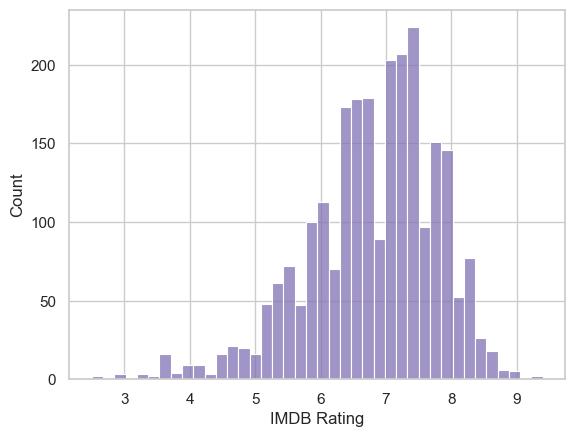

In [444]:
# Histogram showing the imdb rating of movies and tv shows on the platform
sns.histplot(hbo_merged['IMDB Rating'], bins=40, color='m' )
plt.show()

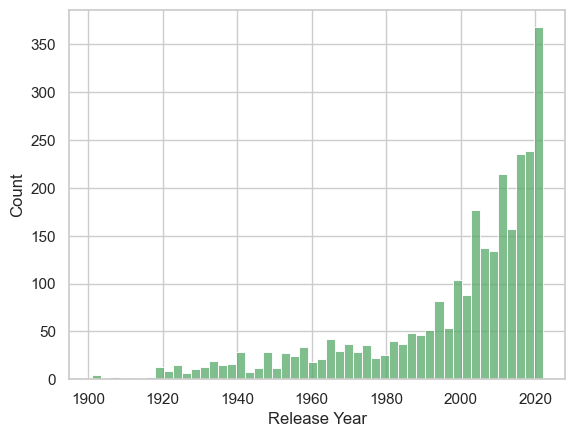

In [445]:
# This chart shows the release year of content on the platform over time
sns.histplot(hbo_merged['Release Year'], bins=50, color='g')
plt.show()

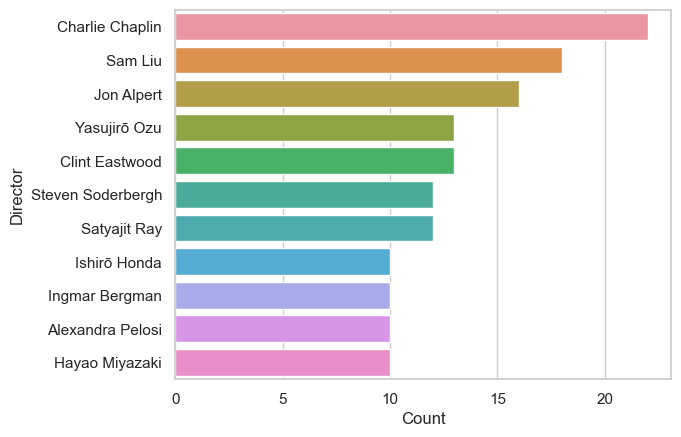

In [446]:
# Chart showing the 11 directors with the most director credits on HBO Max
sns.barplot(x = 'Count', y = 'Director', data = hbo_directors)
plt.show()

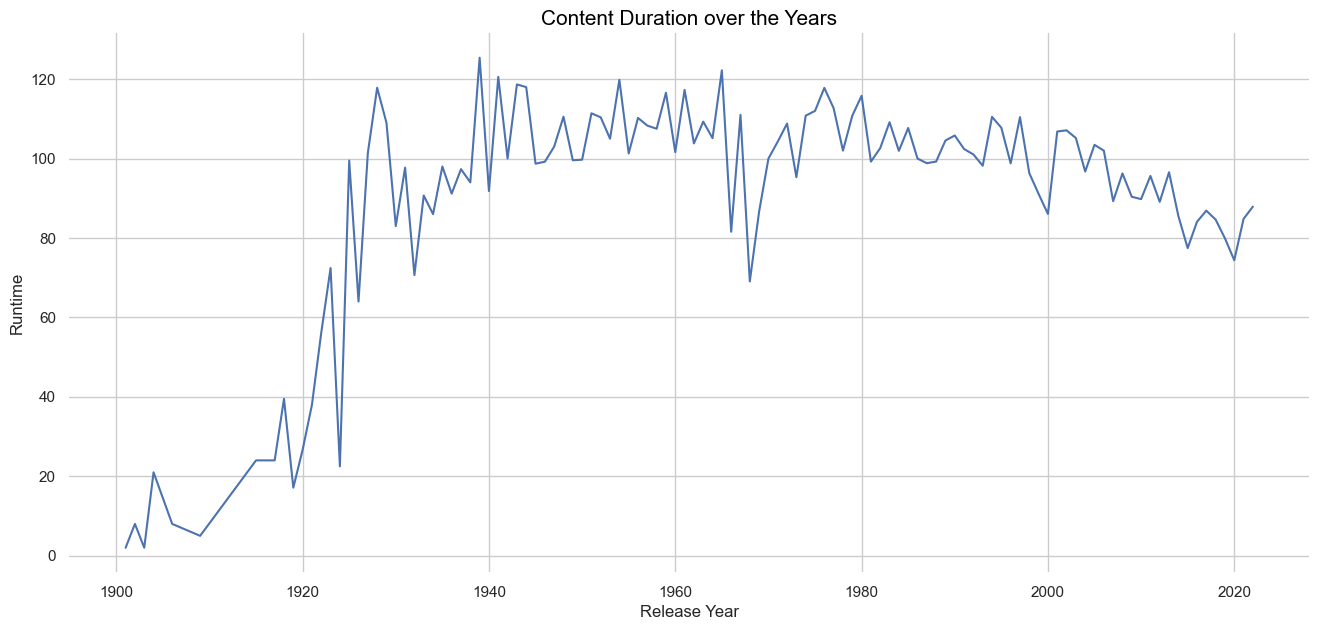

In [447]:
# Line plot showing the average runtime of content on the platform by release year
hbo_runtime = hbo_merged.groupby(['Release Year']).mean()
hbo_runtime = hbo_runtime.sort_index()

plt.figure(figsize=(16,7))
sns.lineplot(x=hbo_runtime.index, y=hbo_runtime.Runtime.values)
plt.box(on=None)

plt.ylabel('Runtime')
plt.xlabel('Release Year')
plt.title('Content Duration over the Years', fontsize=15, color='black')
plt.show()

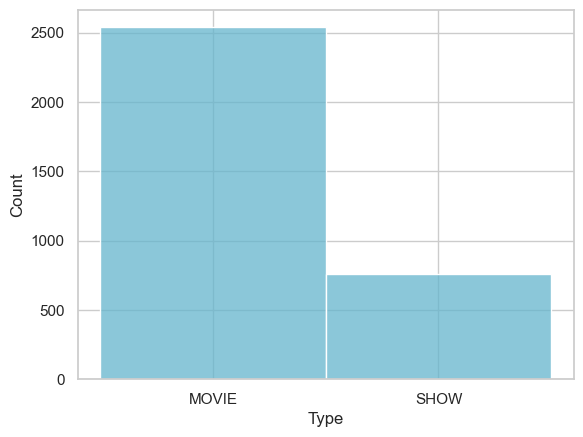

In [449]:
# This chart shows the amount of Movies compared to the amount of TV Shows on the streaming service
sns.histplot(data=hbo_df, x='Type', color='c')
plt.show()

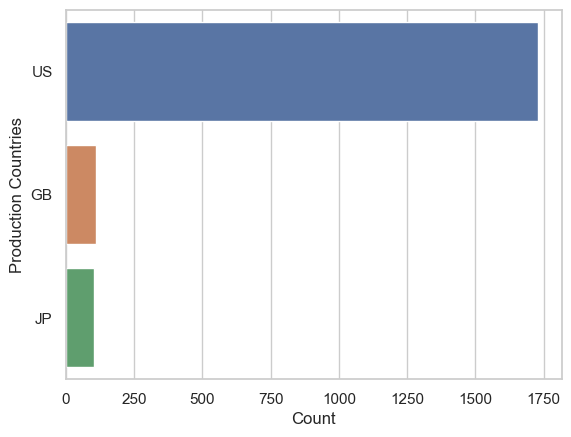

In [451]:
# Chart showing the top 3 countries where content on the platform was produced, this service is dominated by content
# from the United States with well over half of the movies and tv shows on the platform being from that country
sns.barplot(x = 'Count', y = 'Production Countries', data = hbo_country)
plt.show()